### 데이터 분석

분석에 필요한 데이터 읽어오기(20240117_유류정보.csv)

In [1]:
# 필수 모델 연결

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 파일 읽어오기 및 정보 확인
df1 = pd.read_csv("./data/20240117_유류정보.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      793 non-null    object
 1   구       793 non-null    object
 2   상호      793 non-null    object
 3   주소      793 non-null    object
 4   상표      793 non-null    object
 5   전화번호    793 non-null    object
 6   셀프여부    793 non-null    object
 7   휘발유     793 non-null    int64 
 8   경유      793 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 55.9+ KB


In [3]:
# 데이터 확인
df1.head(10)

,지역,구,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울,강남구,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,1559,1469
1,서울,강남구,HD현대오일뱅크㈜직영 산성셀프주유소,서울 강남구 헌릉로 730,HD현대오일뱅크,02-2226-4963,Y,1569,1489
2,서울,강남구,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),HD현대오일뱅크,02-508-6572,Y,1573,1535
3,서울,강남구,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,1597,1519
4,서울,강남구,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,1598,1559
5,서울,강남구,HD현대오일뱅크㈜직영 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),HD현대오일뱅크,02-529-5101,Y,1619,1539
6,서울,강남구,극동유화㈜ 개나리주유소,서울 강남구 언주로 423 (역삼동),S-OIL,02-564-0186,Y,1625,1535
7,서울,강남구,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1625,1545
8,서울,강남구,HD현대오일뱅크㈜직영 유진주유소,서울 강남구 논현로 152 (도곡동),HD현대오일뱅크,02-3462-5215,N,1629,1554
9,서울,강남구,(주)중앙에너비스 수서지점,서울 강남구 광평로 202 (수서동),SK에너지,070-8707-4582,Y,1637,1567


In [4]:
# 유류값 기술통계
df1.describe()

,휘발유,경유
count,793.000000,793.000000
mean,1594.021438,1508.066835
std,158.356444,165.008492
min,1465.000000,1349.000000
25%,1509.000000,1418.000000
50%,1549.000000,1465.000000
75%,1598.000000,1527.000000
max,2611.000000,2729.000000


In [5]:
# 휘발유 최대/최소값 비교
gasMax = np.max(df1['휘발유'])
gasMin = df1["휘발유"].min()

print(f"최대:{gasMax}, 최소:{gasMin}")

최대:2611, 최소:1465


In [6]:
df1.count()["상표"]

793

In [7]:
# 지역별 평균 휘발유/경유 가격 확인
df2=df1.groupby(["지역"])[["휘발유","경유"]].mean()
df2


,휘발유,경유
지역,,
부산,1541.807799,1441.749304
서울,1637.211982,1562.923963


In [8]:
# 지역별/구별 평균 휘발유/경유 가격 확인
df2=df1.groupby(["지역","구"])[["휘발유","경유"]].mean()
df2

휘발유           경유
지역 구                             
부산 강서구   1541.627451  1424.294118
   금정구   1566.050000  1464.900000
   기장군   1519.279070  1435.372093
   남구    1538.344828  1432.896552
   동구    1578.500000  1440.900000
   동래구   1516.555556  1425.000000
   부산진구  1554.260870  1460.521739
   북구    1519.705882  1417.823529
   사상구   1541.000000  1446.690476
   사하구   1539.035714  1426.000000
   서구    1576.200000  1458.300000
   수영구   1566.666667  1486.666667
   연제구   1544.000000  1449.769231
   영도구   1654.125000  1556.625000
   중구    1645.000000  1535.000000
   해운대구  1513.903226  1426.290323
서울 강남구   1843.750000  1770.937500
   강동구   1687.928571  1598.285714
   강북구   1524.916667  1443.666667
   강서구   1579.687500  1518.031250
   관악구   1599.769231  1500.538462
   광진구   1576.076923  1490.538462
   구로구   1606.421053  1517.789474
   금천구   1558.400000  1466.000000
   노원구   1561.785714  1485.357143
   도봉구   1522.937500  1449.250000
   동대문구  1557.647059  1477.235294
   동작구   1609.777778  1547.000000
   마포구   1570.583333  1531.833333
   서대문구  1560.600000  1503.066667
   서초구   1642.870968  1571.838710
   성동구   1713.266667  1647.133333
   성북구   1548.130435  1468.478261
   송파구   1596.037037  1516.259259
   양천구   1554.833333  1482.250000
   영등포구  1646.259259  1574.814815
   용산구   2125.500000  2043.416667
   은평구   1540.400000  1485.933333
   종로구   1934.555556  1864.111111
   중구    1909.400000  1837.200000
   중랑구   1539.384615  1448.615385

In [9]:
# 위 결과에서 지역과 구를 데이터 필드로 이동 => index 재설정
df2=df2.reset_index()  # drop=False(기본): 기존 인덱스를 값필드로 이동, True: 기존인덱스 삭제
df2

,지역,구,휘발유,경유
0,부산,강서구,1541.627451,1424.294118
1,부산,금정구,1566.050000,1464.900000
2,부산,기장군,1519.279070,1435.372093
3,부산,남구,1538.344828,1432.896552
4,부산,동구,1578.500000,1440.900000
5,부산,동래구,1516.555556,1425.000000
6,부산,부산진구,1554.260870,1460.521739
7,부산,북구,1519.705882,1417.823529
8,부산,사상구,1541.000000,1446.690476
9,부산,사하구,1539.035714,1426.000000


시각화 기본

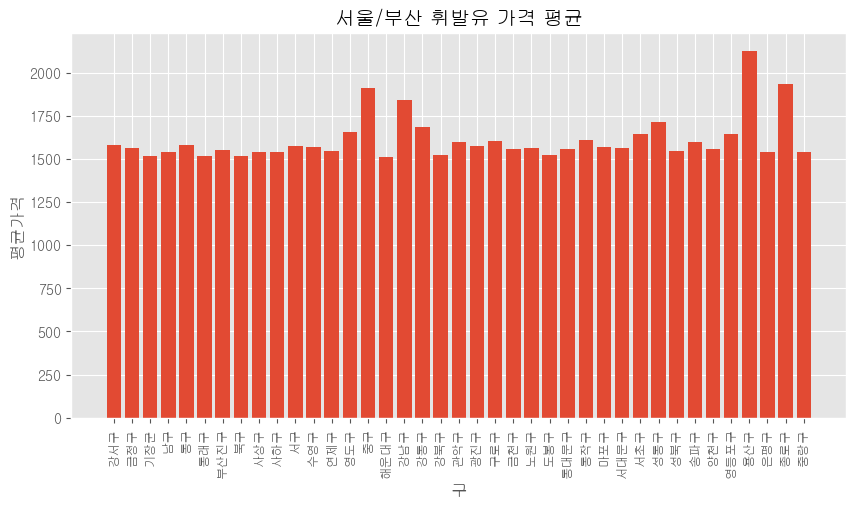

In [10]:
from matplotlib import font_manager

font_path="C:/Windows/Fonts/gulim.ttc"   # 윈도우 글꼴 정보
font = font_manager.FontProperties(fname=font_path).get_name() # 정의된 글꼴에 대한 정보 취득
plt.rc("font", family=font)   # rc(): plt에 대한 환경정보를 관리하는 메서드

plt.style.use("ggplot")        # 차트 스타일 설정
plt.figure(figsize=(10, 5))    # 차트기본환경 설정(차트 크기)
plt.xticks(size=9, rotation=90) # x축 레이블에 대한 설정(글자크기9, 기울기45도)

plt.bar(df2.구, df2["휘발유"])  # 바차트 생성, plt.bar(x축, y축-값축)

plt.title("서울/부산 휘발유 가격 평균")  #차트 제목
plt.xlabel("구")               
plt.ylabel("평균가격")

plt.show()   # 차트를 화면에 출력